<a href="https://colab.research.google.com/github/NguyenQuangHuy2001/AI_CNN/blob/main/CNN_selfface_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Khai báo thư viện

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2


Load dữ liệu train đã up lên drive cá nhân

In [ ]:
train_list = glob.glob('/content/drive/MyDrive/HInhAI/Train/*.jpg')
train_list.sort()
print (train_list)
#/content/drive/MyDrive/HInhAI/Train

['/content/drive/MyDrive/HInhAI/Train/BanVuong_00.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_01.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_02.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_03.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_04.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_05.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_06.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_07.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_08.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_09.jpg', '/content/drive/MyDrive/HInhAI/Train/BanVuong_10.jpg', '/content/drive/MyDrive/HInhAI/Train/Bản sao của BanPhuc_00.jpg', '/content/drive/MyDrive/HInhAI/Train/Bản sao của BanPhuc_01.jpg', '/content/drive/MyDrive/HInhAI/Train/Bản sao của BanPhuc_02.jpg', '/content/drive/MyDrive/HInhAI/Train/Bản sao của BanPhuc_03.jpg', '/content/drive/MyDrive/HInhAI/Train/Bản sao của BanPhuc_04.jpg', '/content/drive/MyDrive/HInhAI/Train/Bản sao của Ban

Load dữ liệu test đã up lên drive cá nhân

In [ ]:
test_list = glob.glob('/content/drive/MyDrive/HInhAI/Test/*.jpg')
test_list.sort()
print (test_list)
#/content/drive/MyDrive/HInhAI/Test

['/content/drive/MyDrive/HInhAI/Test/BanPhuc_10.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_11.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_12.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_13.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_14.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_15.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_16.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_17.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_18.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_19.jpg', '/content/drive/MyDrive/HInhAI/Test/BanPhuc_20.jpg', '/content/drive/MyDrive/HInhAI/Test/BanVuong_11.jpg', '/content/drive/MyDrive/HInhAI/Test/BanVuong_12.jpg', '/content/drive/MyDrive/HInhAI/Test/BanVuong_13.jpg', '/content/drive/MyDrive/HInhAI/Test/BanVuong_14.jpg', '/content/drive/MyDrive/HInhAI/Test/BanVuong_15.jpg', '/content/drive/MyDrive/HInhAI/Test/BanVuong_16.jpg', '/content/drive/MyDrive/HInhAI/Test/BanVuong_17.jpg', '/content/drive/MyDrive/HInhAI/Test/Ba

Xử lý dữ liệu

In [ ]:
x_train = np.zeros([len(train_list),150,150,3],dtype=np.uint8)

for i in range(len(train_list)):
  image = load_img(train_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_train[i] = array

x_test = np.zeros([len(test_list),150,150,3],dtype=np.uint8)

for i in range(len(test_list)):
  image = load_img(test_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_test[i] = array

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
y_train = np.zeros([len(train_list)])
y_test = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

for i in range (len(train_list)):
  if i>=21 and i<42:
    y_train[i] = 1
  else:
    y_train[i] = 0
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)
y_label = ['khong phai Huy','Ban Huy']
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Tạo model

In [ ]:
model= Sequential()
#BLOCK 1
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#BLOCK 2
model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))
#BLOCK 3
model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(2, activation='softmax'))

Training model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=150,batch_size = 128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.7326 - accuracy: 0.4878 - val_loss: 0.5620 - val_accuracy: 0.6774
Epoch 2/150
1/1 [==============================] - 0s 109ms/step - loss: 0.4330 - accuracy: 0.7317 - val_loss: 3.6824 - val_accuracy: 0.6774
Epoch 3/150
1/1 [==============================] - 0s 110ms/step - loss: 5.5500 - accuracy: 0.5122 - val_loss: 0.4559 - val_accuracy: 0.6774
Epoch 4/150
1/1 [==============================] - 0s 108ms/step - loss: 0.6743 - accuracy: 0.5122 - val_loss: 1.1530 - val_accuracy: 0.3226
Epoch 5/150
1/1 [==============================] - 0s 109ms/step - loss: 0.8813 - accuracy: 0.4878 - val_loss: 0.9493 - val_accuracy: 0.3226
Epoch 6/150
1/1 [==============================] - 0s 101ms/step - loss: 0.7277 - accuracy: 0.4878 - val_loss: 0.3817 - val_accuracy: 1.0000
Epoch 7/150
1/1 [==============================] - 0s 107ms/step - loss: 0.3619 - accuracy: 1.0000 - val_loss: 0.4372 - val_accuracy: 0.6774
Epoch 8/150
1/1 

Lưu model

In [ ]:
model.save('CNN_Self_Face_Recognition.h5')

Đánh giá độ chính xác

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print ('loss = ',score[0])
print ('accuracy = ',score[1])

loss =  1.04980483683903e-06
accuracy =  1.0


Chạy dự đoán kết quả

picture  17
picture  17
predictions number: [0]
predictions: khong phai Huy


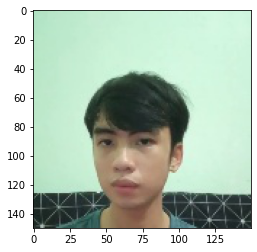

In [ ]:
i = randint(0,len(test_list)-1)
print ('picture ',i)
predict_test = test_list[i]
image = load_img(predict_test,target_size=(150,150))
array = img_to_array(image)
plt.imshow(image)
# Sample Predict
sample = np.array([array])
predictions = np.argmax(model.predict(sample), axis=-1)
print ('picture ',i)
print("predictions number:", predictions)
print("predictions:", y_label[int(predictions)])

Vễ độ thị độ chính xác

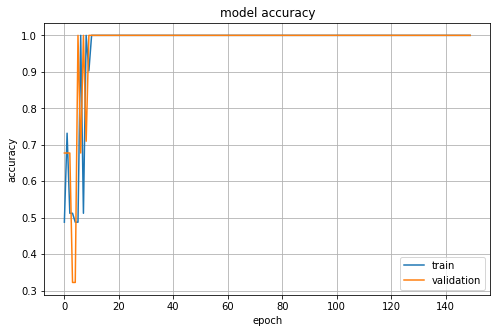

In [ ]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()